In [1]:
#importing required libraries
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import cv2 as cv
import matplotlib.pyplot as plt
import glob

In [2]:
# reading the image
cv_img = []

a = sorted(glob.glob("jpg300\*"))

for img in a:
    image = cv.imread(img)
    cv_img.append(image)
    print(image.shape)




(500, 591, 3)
(500, 625, 3)
(667, 500, 3)
(500, 667, 3)
(500, 508, 3)
(500, 535, 3)
(500, 667, 3)
(500, 667, 3)
(510, 500, 3)
(500, 667, 3)
(748, 500, 3)
(500, 530, 3)
(500, 666, 3)
(500, 645, 3)
(500, 755, 3)
(500, 752, 3)
(500, 531, 3)
(500, 751, 3)
(500, 667, 3)
(501, 762, 3)
(500, 666, 3)
(529, 500, 3)
(500, 754, 3)
(500, 666, 3)
(500, 754, 3)
(500, 720, 3)
(500, 617, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 667, 3)
(500, 571, 3)
(500, 666, 3)
(500, 715, 3)
(500, 666, 3)
(500, 667, 3)
(500, 667, 3)
(500, 750, 3)
(500, 644, 3)
(500, 667, 3)
(500, 565, 3)
(500, 556, 3)
(500, 667, 3)
(500, 667, 3)
(500, 721, 3)
(500, 666, 3)
(500, 617, 3)
(667, 500, 3)
(501, 614, 3)
(500, 667, 3)
(500, 666, 3)
(500, 667, 3)
(604, 500, 3)
(500, 750, 3)
(500, 666, 3)
(500, 666, 3)
(500, 667, 3)
(500, 754, 3)
(500, 666, 3)
(500, 740, 3)
(500, 667, 3)
(500, 674, 3)
(510, 501, 3)
(500, 667, 3)
(579, 500, 3)
(500, 667, 3)
(500, 557, 3)
(500, 667, 3)
(500, 754, 3)
(500, 667, 3)
(500, 750, 3)
(500, 

In [3]:
import numpy as np

fd_array = []
x2 = []
#creating hog features

for img in cv_img:
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(16, 16),
                	cells_per_block=(1, 1), visualize=True, multichannel=True, transform_sqrt=True)
    temp = np.linalg.norm(hog_image)
    x2.append(temp)
    fd_array.append(hog_image)
    


In [4]:
x1 = np.ones(300)

X = np.vstack((x1,x2)).T


y = []

In [5]:
labels = open("flowers_labels.txt","r")

for i in range(300):

    line = labels.readline().strip().split("\n")
    y.append(line)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)

In [7]:
reg = LinearRegression().fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)
 


Coefficients:  [[0.         0.02593358]]


In [8]:
y_pred = reg.predict(X_test)
print(y_pred)

[[77.0540399 ]
 [74.89483826]
 [77.04039616]
 [75.91170439]
 [75.34473411]
 [76.672138  ]
 [75.89015044]
 [75.72711635]
 [75.98475435]
 [77.4585519 ]
 [76.6280692 ]
 [76.72149174]
 [76.97835848]
 [75.5456362 ]
 [76.94179627]
 [77.81866282]
 [75.03749499]
 [76.73832917]
 [75.344229  ]
 [75.76624795]
 [76.05596609]
 [74.77811928]
 [77.59336059]
 [76.81215062]
 [76.98757822]
 [75.90229865]
 [76.78916055]
 [74.54004597]
 [76.42554284]
 [77.68415392]
 [76.44818607]
 [77.01778165]
 [75.67064105]
 [78.64373983]
 [75.71037396]
 [76.49630349]
 [76.16873201]
 [76.95439612]
 [76.39350668]
 [76.73564846]
 [77.48590003]
 [76.87399277]
 [75.46461404]
 [76.90083233]
 [76.90819062]
 [75.85945835]
 [76.86691554]
 [77.84746322]
 [77.07899671]
 [75.58279512]
 [76.43370659]
 [78.57292749]
 [76.03199111]
 [76.44095398]
 [75.2250072 ]
 [75.39436548]
 [78.1775738 ]
 [75.5868928 ]
 [77.38085821]
 [76.80681566]
 [77.68557146]
 [77.24556335]
 [75.9811575 ]
 [75.6102114 ]
 [76.24912102]
 [75.96179881]
 [75.73389

In [9]:
accuracies = {}

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, metric= "minkowski",p=2)
knn.fit(X_train, y_train) 
y_predict = knn.predict(X_test) 
y_predict  


C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['77', '73', '77', '77', '77', '77', '77', '77', '77', '77', '77',
       '77', '77', '73', '77', '77', '73', '77', '77', '77', '77', '73',
       '77', '77', '77', '77', '77', '73', '77', '77', '77', '77', '77',
       '77', '77', '77', '77', '77', '77', '77', '77', '77', '73', '77',
       '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '73',
       '73', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77',
       '77', '77', '77', '77', '77', '77'], dtype='<U2')

In [10]:
acc = knn.score(X_test, y_test)*100
accuracies['5 Neighbour Score'] = acc
print("{} Neighbour Score: {:.2f}%".format(5, knn.score(X_test, y_test)*100))

5 Neighbour Score: 94.44%


C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

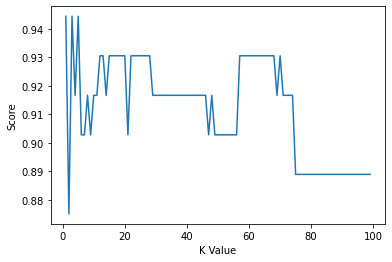

In [11]:
score_list = []
for each in range(1,100):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,100),score_list)
plt.xlabel("K Value")
plt.ylabel("Score")
plt.show()

In [12]:
acc = max(score_list)*100
accuracies[' KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

Maximum KNN Score is 94.44%


In [13]:
X_test.shape

(72, 2)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy : {:.2f}%".format(acc))

Test Accuracy : 90.28%


C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

acc = dt.score(X_test,y_test)*100
accuracies['Decision Tree'] = acc
print("Test Accuracy : {:.2f}%".format(acc))

Test Accuracy : 94.44%


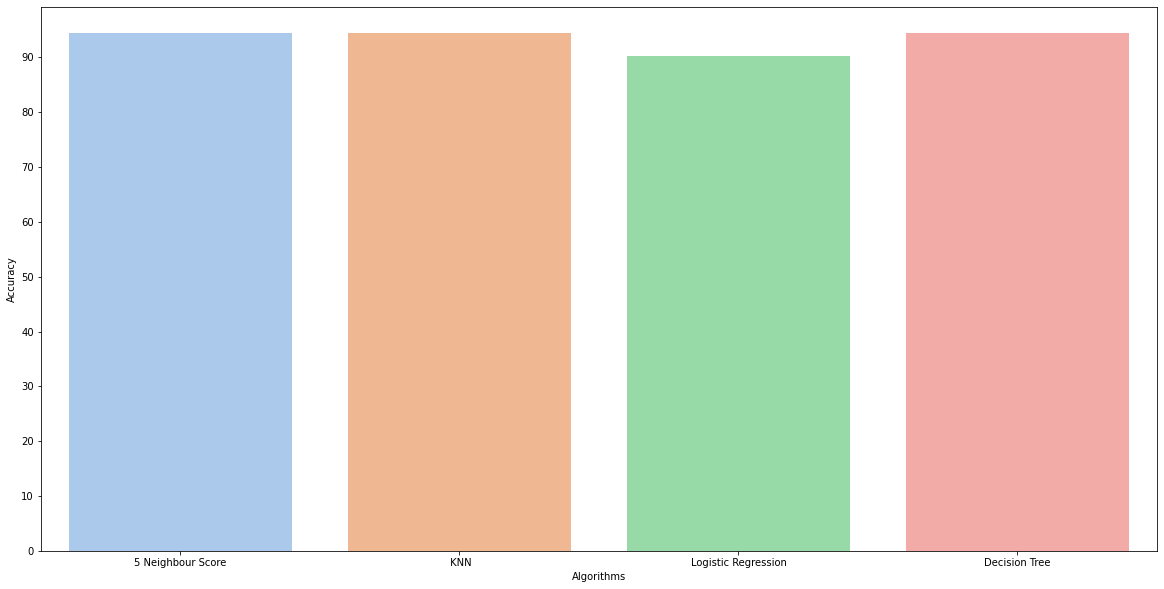

In [16]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="pastel")
plt.show()

In [17]:
x3 = []
df_array = []

In [18]:
for img in cv_img:

    # Initiate ORB detector
    orb = cv.ORB_create()
    # find the keypoints with ORB
    kp = orb.detect(img,None)
    # compute the descriptors with ORB
    kp, des = orb.compute(img, kp)
    # draw only keypoints location,not size and orientation
    img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
    temp = np.linalg.norm(img2)
    x3.append(temp)
    df_array.append(img2)
   

In [19]:
X1 = np.vstack((x1,x2,x3)).T
X1.shape

(300, 3)

In [20]:
accur = {}

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.24, random_state=42)

In [22]:
knn = KNeighborsClassifier(n_neighbors= 5, metric= "minkowski",p=2)
knn.fit(X_train, y_train) 
y_predict = knn.predict(X_test) 
y_predict   

C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77',
       '73', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77',
       '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77',
       '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '77',
       '77', '73', '77', '77', '77', '77', '77', '77', '77', '77', '77',
       '77', '77', '77', '77', '77', '77', '77', '77', '77', '77', '73',
       '77', '77', '77', '77', '77', '73'], dtype='<U2')

In [23]:
acc = knn.score(X_test, y_test)*100
accur['5 Neighbour Score'] = acc
print("{} Neighbour Score: {:.2f}%".format(5, knn.score(X_test, y_test)*100))

5 Neighbour Score: 83.33%


C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

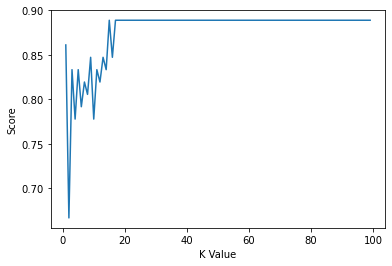

In [24]:
score_list = []
for each in range(1,100):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test,y_test))
    
plt.plot(range(1,100),score_list)
plt.xlabel("K Value")
plt.ylabel("Score")
plt.show()

In [25]:
acc = max(score_list)*100
accur[' KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

Maximum KNN Score is 88.89%


In [26]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
acc = lr.score(X_test,y_test)*100
accur['Logistic Regression'] = acc
print("Test Accuracy : {:.2f}%".format(acc))

Test Accuracy : 88.89%


C:\Users\Fatih\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

acc = dt.score(X_test,y_test)*100
accur['Decision Tree'] = acc
print("Test Accuracy : {:.2f}%".format(acc))

Test Accuracy : 87.50%


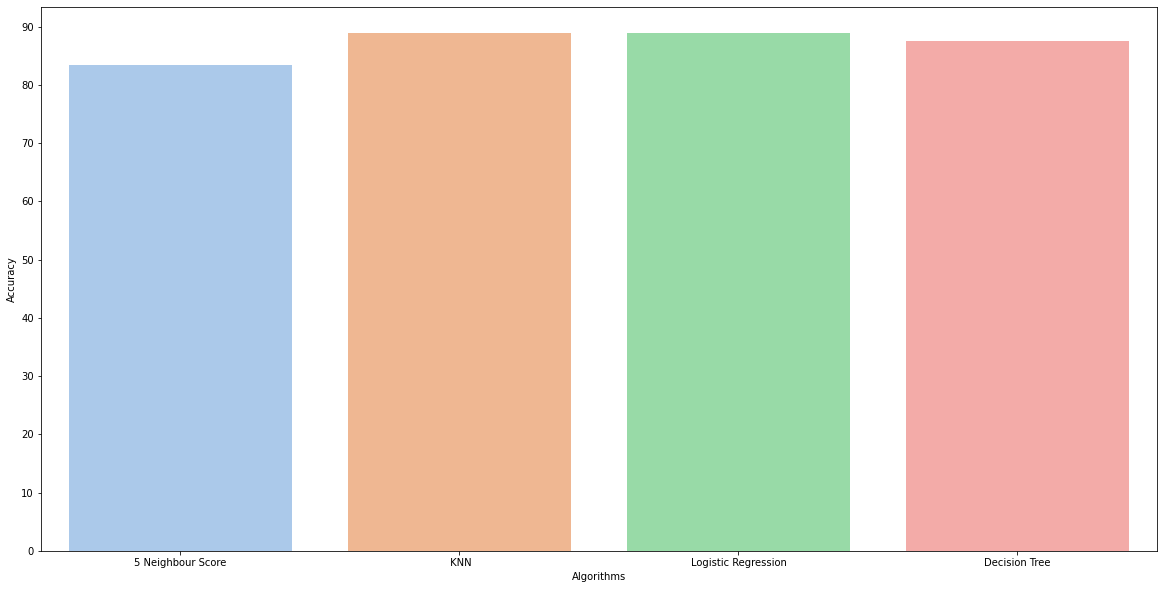

In [28]:
plt.figure(figsize=(20,10))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accur.keys()), y=list(accur.values()), palette="pastel")
plt.show()